## Majority vote: from generated results to majority score

In [1]:
# Turn generated responses into majority vote results, with range of majority as variable

import subprocess
import os
import argparse
from tqdm import tqdm

# Set environment variables
env = os.environ.copy()

ranges = list(range(1, 512, 10))

for range_count in tqdm(ranges):
    command = f'''python ../../llmonk/verifier/math_majority.py \
    samples_dir=/home/richard/Downloads/large_language_monkeys/results/math_samples_2 \
    save_dir=/home/richard/Downloads/large_language_monkeys/results/math_majority_2_{range_count} \
    offset=0 \
    stride=1 \
    limit=128 \
    majority_range={range_count} \
    dset=math
    '''

    result = subprocess.run(command, shell=True, env=env)

    if result.returncode == 0:
        print(f"Script executed successfully for range {range_count}")
    else:
        print(f"Script failed with return code {result.returncode} for range {range_count}")

Loading generations: 81it [00:00, 46558.67it/s]


Taking majority on 81 problems.


multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/richard/miniconda3/envs/llmonk/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/home/richard/miniconda3/envs/llmonk/lib/python3.11/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/home/richard/Downloads/large_language_monkeys/llmonk/evaluate/../../llmonk/verifier/math_majority.py", line 110, in process_sample
    result["majority_sample"] = majority_answer
                                ^^^^^^^^^^^^^^^
UnboundLocalError: cannot access local variable 'majority_answer' where it is not associated with a value
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/richard/Downloads/large_language_monkeys/llmonk/evaluate/../../llmonk/verifier/math_majority.py", line 157,

Script failed with return code 1 for range 1


Loading generations: 81it [00:00, 46731.59it/s]


Taking majority on 81 problems.


multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/richard/miniconda3/envs/llmonk/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/home/richard/miniconda3/envs/llmonk/lib/python3.11/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/home/richard/Downloads/large_language_monkeys/llmonk/evaluate/../../llmonk/verifier/math_majority.py", line 110, in process_sample
    result["majority_sample"] = majority_answer
                                ^^^^^^^^^^^^^^^
UnboundLocalError: cannot access local variable 'majority_answer' where it is not associated with a value
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/richard/Downloads/large_language_monkeys/llmonk/evaluate/../../llmonk/verifier/math_majority.py", line 157,

Script failed with return code 1 for range 11


  4%|▍         | 2/52 [00:12<05:07,  6.15s/it]


KeyboardInterrupt: 

Loading generations: 81it [00:00, 49287.48it/s]


Taking majority on 81 problems.


multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/richard/miniconda3/envs/llmonk/lib/python3.11/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/home/richard/miniconda3/envs/llmonk/lib/python3.11/multiprocessing/pool.py", line 48, in mapstar
    return list(map(*args))
           ^^^^^^^^^^^^^^^^
  File "/home/richard/Downloads/large_language_monkeys/llmonk/evaluate/../../llmonk/verifier/math_majority.py", line 110, in process_sample
    result["majority_sample"] = majority_answer
                                ^^^^^^^^^^^^^^^
UnboundLocalError: cannot access local variable 'majority_answer' where it is not associated with a value
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/richard/Downloads/large_language_monkeys/llmonk/evaluate/../../llmonk/verifier/math_majority.py", line 157,

In [ ]:
# Turn majority vote results into evaluation results

import subprocess
import os
import argparse
from tqdm import tqdm

# Set environment variables
env = os.environ.copy()

ranges = list(range(1, 512, 10))

for range_count in tqdm(ranges):
    command = f'''python ../../llmonk/evaluate/math_datasets_majority.py \
    samples_dir=/home/richard/Downloads/large_language_monkeys/results/math_majority_8_{range_count} \
    save_dir=/home/richard/Downloads/large_language_monkeys/results/math_eval_majority_8_{range_count} \
    offset=0 \
    stride=1 \
    limit=128 \
    dset=math
    '''

    result = subprocess.run(command, shell=True, env=env)

    if result.returncode == 0:
        print(f"Script executed successfully for range {range_count}")
    else:
        print(f"Script failed with return code {result.returncode} for range {range_count}")

In [60]:
from pathlib import Path
import yaml

def load_yaml(path: Path):
    with open(path, "r") as f:
        data = yaml.load(f, Loader=yaml.CLoader)

    return data

In [82]:
# Load in the evaluation results as a score dict

from pathlib import Path
import yaml
from tqdm import tqdm

# Directory containing YAML files
scores = {}

for range_count in tqdm(range(1, 512, 10)):
    checks_dir = Path(f'/home/richard/Downloads/large_language_monkeys/results/math_eval_majority_1_{range_count}')

    # Iterate through all YAML files in the directory
    correct_count = 0
    total_count = 0

    for yaml_file in checks_dir.glob('*.yaml'):
        total_count += 1
        data = load_yaml(yaml_file)
        checks = data['is_corrects']
        if True in checks:
            correct_count += 1
            continue

    score = correct_count / total_count
    scores[range_count] = score



  0%|          | 0/52 [00:00<?, ?it/s]

100%|██████████| 52/52 [01:00<00:00,  1.16s/it]


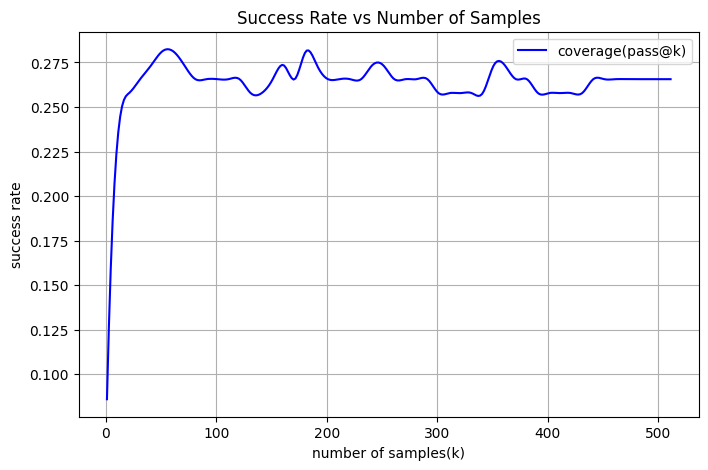

In [84]:
# Plot the scores

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


# Extracting x and y values from the dictionary where key < 512
x_vals = [key for key in scores.keys() if key < 512]
y_vals = [scores[key] for key in x_vals]

# Creating a smooth curve using spline interpolation
x_new = np.linspace(min(x_vals), max(x_vals), 300)  # More points for a smoother curve
spl = make_interp_spline(x_vals, y_vals, k=3)  # k=3 for cubic spline
y_smooth = spl(x_new)

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(x_new, y_smooth, color='blue', label='coverage(pass@k)')

# Adding annotations and labels
plt.xlabel('number of samples(k)')
plt.ylabel('success rate')
plt.title('Success Rate vs Number of Samples')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

## Coverage: calculate and plot 

In [55]:
from pathlib import Path
import yaml

def load_yaml(path: Path):
    with open(path, "r") as f:
        data = yaml.load(f, Loader=yaml.CLoader)

    return data

In [87]:
# Loading eval results of coverage

from pathlib import Path
import yaml
from tqdm import tqdm

# Directory containing YAML files
checks_dir = Path('/home/richard/Downloads/large_language_monkeys/results/math_eval_1')


# Iterate through all YAML files in the directory
x_values = list(range(0, 512, 10))
results = {}

for x in tqdm(x_values):

    correct_count = 0
    total_count = 0

    for yaml_file in checks_dir.glob('*.yaml'):
        total_count += 1
        data = load_yaml(yaml_file)
        checks = data['is_corrects']
        if True in checks[:x]:
            correct_count += 1
            continue
    
    results[x] = correct_count/total_count


100%|██████████| 52/52 [01:19<00:00,  1.53s/it]


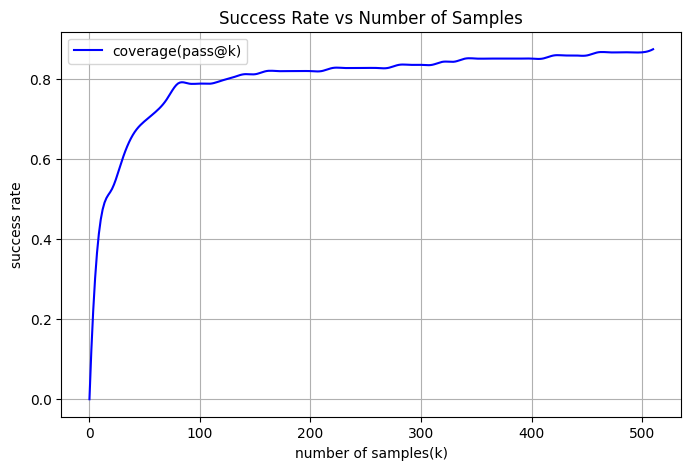

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


# Extracting x and y values from the dictionary where key < 512
x_vals = [key for key in results.keys() if key < 512]
y_vals = [results[key] for key in x_vals]

# Creating a smooth curve using spline interpolation
x_new = np.linspace(min(x_vals), max(x_vals), 300)  # More points for a smoother curve
spl = make_interp_spline(x_vals, y_vals, k=3)  # k=3 for cubic spline
y_smooth = spl(x_new)

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(x_new, y_smooth, color='blue', label='coverage(pass@k)')

# Adding annotations and labels
plt.xlabel('number of samples(k)')
plt.ylabel('success rate')
plt.title('Success Rate vs Number of Samples')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

In [81]:
len(checks)

1024

In [86]:
len(results)

0

## Combine coverage with majority success rate

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming 'scores' and 'results' are dictionaries you have defined
# Example data (replace with your actual data):
# scores = {100: 0.1, 200: 0.2, 300: 0.3, 400: 0.4, 500: 0.5}
# results = {100: 0.05, 200: 0.15, 300: 0.25, 400: 0.35, 500: 0.45}

# Extracting x and y values for 'scores'
# x_vals_scores = [key for key in scores.keys() if key < 512]
x_vals_scores = [key for key in scores.keys()]
y_vals_scores = [scores[key] for key in x_vals_scores]

# Extracting x and y values for 'results'
# x_vals_results = [key for key in results.keys() if key < 512]
x_vals_results = [key for key in results.keys()]
y_vals_results = [results[key] for key in x_vals_results]

# Creating smooth curves using spline interpolation for 'scores'
x_new_scores = np.linspace(min(x_vals_scores), max(x_vals_scores), 300)
spl_scores = make_interp_spline(x_vals_scores, y_vals_scores, k=3)
y_smooth_scores = spl_scores(x_new_scores)

# Creating smooth curves using spline interpolation for 'results'
x_new_results = np.linspace(min(x_vals_results), max(x_vals_results), 300)
spl_results = make_interp_spline(x_vals_results, y_vals_results, k=3)
y_smooth_results = spl_results(x_new_results)

# Plotting the graphs
plt.figure(figsize=(8, 5))
plt.plot(x_new_scores, y_smooth_scores, color='green', label='Majority Vote among k')
plt.plot(x_new_results, y_smooth_results, color='blue', label='Coverage(pass@k) - results')

# Adding annotations and labels
plt.xlabel('number of samples(k)')
plt.ylabel('success rate')
plt.title('Success Rate vs Number of Samples - 8 Crompt')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


ValueError: min() arg is an empty sequence

In [78]:
scores_8 = scores
results_8 = results

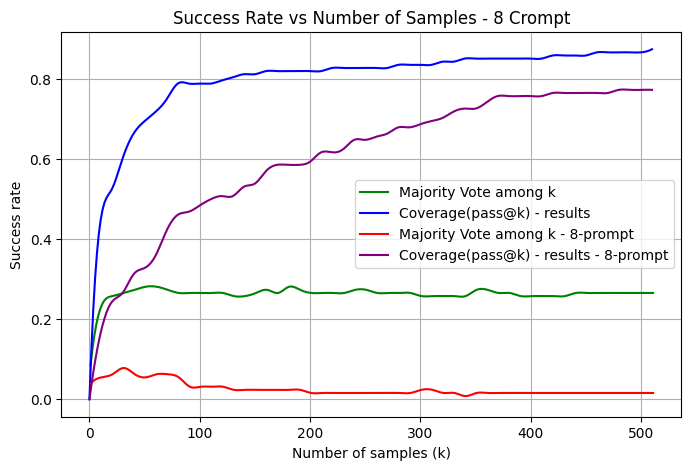

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming 'scores', 'results', 'score_8', and 'result_8' are dictionaries you have defined
# Example data (replace with your actual data):
# scores = {100: 0.1, 200: 0.2, 300: 0.3, 400: 0.4, 500: 0.5}
# results = {100: 0.05, 200: 0.15, 300: 0.25, 400: 0.35, 500: 0.45}
# score_8 = {100: 0.12, 200: 0.22, 300: 0.32, 400: 0.42, 500: 0.52}
# result_8 = {100: 0.07, 200: 0.17, 300: 0.27, 400: 0.37, 500: 0.47}

# Extracting x and y values for 'scores'
x_vals_scores = [key for key in scores.keys()]
y_vals_scores = [scores[key] for key in x_vals_scores]

# Extracting x and y values for 'results'
x_vals_results = [key for key in results.keys()]
y_vals_results = [results[key] for key in x_vals_results]

# Extracting x and y values for 'score_8'
x_vals_score_8 = [key for key in scores_8.keys()]
y_vals_score_8 = [scores_8[key] for key in x_vals_score_8]

# Extracting x and y values for 'result_8'
x_vals_result_8 = [key for key in results_8.keys()]
y_vals_result_8 = [results_8[key] for key in x_vals_result_8]

# Creating smooth curves using spline interpolation for 'scores'
x_new_scores = np.linspace(min(x_vals_scores), max(x_vals_scores), 300)
spl_scores = make_interp_spline(x_vals_scores, y_vals_scores, k=3)
y_smooth_scores = spl_scores(x_new_scores)

# Creating smooth curves using spline interpolation for 'results'
x_new_results = np.linspace(min(x_vals_results), max(x_vals_results), 300)
spl_results = make_interp_spline(x_vals_results, y_vals_results, k=3)
y_smooth_results = spl_results(x_new_results)

# Creating smooth curves using spline interpolation for 'score_8'
x_new_score_8 = np.linspace(min(x_vals_score_8), max(x_vals_score_8), 300)
spl_score_8 = make_interp_spline(x_vals_score_8, y_vals_score_8, k=3)
y_smooth_score_8 = spl_score_8(x_new_score_8)

# Creating smooth curves using spline interpolation for 'result_8'
x_new_result_8 = np.linspace(min(x_vals_result_8), max(x_vals_result_8), 300)
spl_result_8 = make_interp_spline(x_vals_result_8, y_vals_result_8, k=3)
y_smooth_result_8 = spl_result_8(x_new_result_8)

# Plotting the graphs
plt.figure(figsize=(8, 5))
plt.plot(x_new_scores, y_smooth_scores, color='green', label='Majority Vote among k')
plt.plot(x_new_results, y_smooth_results, color='blue', label='Coverage(pass@k) - results')
plt.plot(x_new_score_8, y_smooth_score_8, color='red', label='Majority Vote among k - 8-prompt')
plt.plot(x_new_result_8, y_smooth_result_8, color='purple', label='Coverage(pass@k) - results - 8-prompt')

# Adding annotations and labels
plt.xlabel('Number of samples (k)')
plt.ylabel('Success rate')
plt.title('Success Rate vs Number of Samples - 8 Crompt')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()
